In [ ]:
import stereo as st
from stereo.core.stereo_exp_data import AnnBasedStereoExpData
import warnings
warnings.filterwarnings('ignore')

test_file = '/data/user/mowp/data/stereo-seq/Demo_MouseBrain/SS200000135TL_D1.cellbin.gef'
ref_file = '/data/user/mowp/data/stereo-seq/Demo_SingleR/Reference/Mouse_brain_ref.anndata075.h5ad'

data = st.io.read_gef(test_file, bin_type='cell_bins')
ref = AnnBasedStereoExpData(ref_file)

In [ ]:
# preprocessing
ref.tl.log1p()
ref.tl.normalize_total()

data.tl.cal_qc()
data.tl.log1p()
data.tl.normalize_total()

In [10]:
ref

AnnData object with n_obs × n_vars = 67419 × 20170
    obs: 'ClusterName'
    var: 'Accession'
    uns: 'sn'

In [3]:
data

StereoExpData object with n_cells X n_genes = 57133 X 24670
bin_type: cell_bins
offset_x = None
offset_y = None
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []

In [ ]:
# do it!
data.tl.single_r(
                ref_exp_data=ref,
                ref_use_col='ClusterName',
                res_key='annotation'
                )

[2023-10-23 08:39:21][Stereo][3410636][MainThread][139863427290944][st_pipeline][71][INFO]: register algorithm single_r to <stereo.core.st_pipeline.StPipeline object at 0x7f342eda5040>
[2023-10-23 08:40:17][Stereo][3410636][MainThread][139863427290944][single_r][106][INFO]: start single-r with n_jobs=56 fine_tune_times=0
100%|█████████████████████████████████████████████| 34/34 [00:00<00:00, 77293.41it/s]
[2023-10-23 09:17:24][Stereo][3410636][MainThread][139863427290944][single_r][142][INFO]: scoring test_data finished, cost 2203.349050760269 seconds
[2023-10-23 09:17:27][Stereo][3410636][MainThread][139863427290944][single_r][229][INFO]: fine-tuning with test_data(shape=(57133, 19973))
0it [00:00, ?it/s]INFO:numba.core.transforms:finding looplift candidates
138it [01:23,  1.36it/s]IOStream.flush timed out
167it [03:04,  1.73it/s]INFO:numba.core.transforms:finding looplift candidates
19283it [20:35:37,  1.96s/it]IOPub message rate exceeded.
The notebook server will temporarily stop se

In [7]:
data

StereoExpData object with n_cells X n_genes = 57133 X 24670
bin_type: cell_bins
offset_x = None
offset_y = None
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'annotation']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

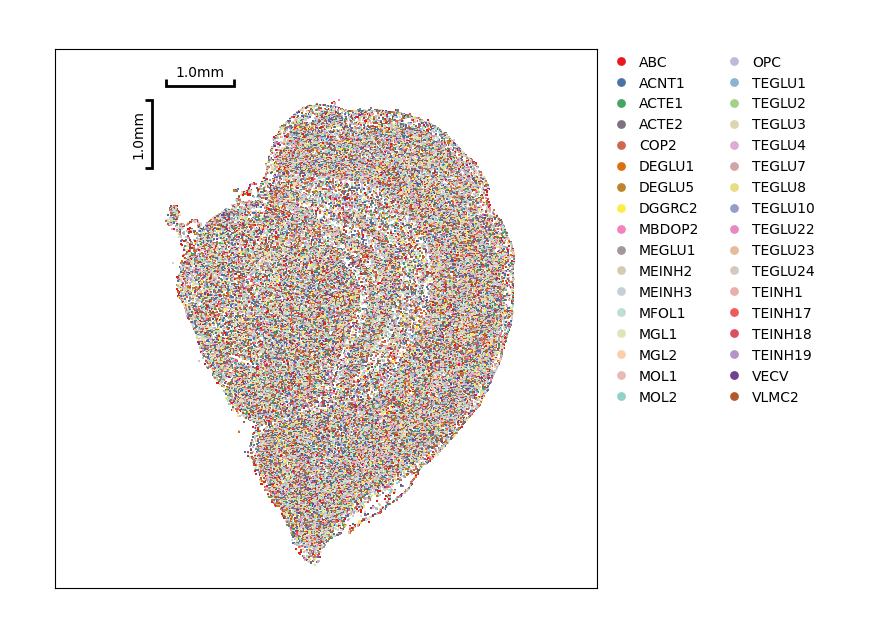

In [8]:
data.plt.cluster_scatter(res_key='annotation')